In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization and EDA

In [3]:
songs = pd.read_csv('data/Most Streamed Spotify Songs 2024.csv', encoding='latin')

In [4]:
songs.describe().T

count       mean        std   min   25%   50%  \
Track Score                 4600.0  41.844043  38.543766  19.4  23.3  29.9   
Spotify Popularity          3796.0  63.501581  16.186438   1.0  61.0  67.0   
Apple Music Playlist Count  4039.0  54.603120  71.612270   1.0  10.0  28.0   
Deezer Playlist Count       3679.0  32.310954  54.274538   1.0   5.0  15.0   
Amazon Playlist Count       3545.0  25.348942  25.989826   1.0   8.0  17.0   
TIDAL Popularity               0.0        NaN        NaN   NaN   NaN   NaN   
Explicit Track              4600.0   0.358913   0.479734   0.0   0.0   0.0   

                               75%    max  
Track Score                 44.425  725.4  
Spotify Popularity          73.000   96.0  
Apple Music Playlist Count  70.000  859.0  
Deezer Playlist Count       37.000  632.0  
Amazon Playlist Count       34.000  210.0  
TIDAL Popularity               NaN    NaN  
Explicit Track               1.000    1.0

In [5]:
coffee = pd.read_csv('data/merged_data_cleaned.csv', index_col=0)

In [6]:
coffee.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [116]:
coffee.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [7]:
coffee['Harvest.Year'].str.isnumeric().value_counts(dropna=False)

Harvest.Year
True     1128
False     164
NaN        47
Name: count, dtype: int64

In [8]:
coffee['Harvest.Year'].dropna().str.isnumeric().value_counts(dropna=False)

Harvest.Year
True     1128
False     164
Name: count, dtype: int64

In [10]:
coffee_valid_years = coffee[coffee['Harvest.Year'].str.isnumeric() == True]

In [11]:
coffee_valid_years['Harvest.Year'].unique()

array(['2014', '2013', '2012', '2015', '2011', '2016', '2010', '2017',
       '2018'], dtype=object)

In [13]:
coffee_valid_years['Harvest.Year'] = coffee_valid_years['Harvest.Year'].astype(int)

C:\Users\Master\AppData\Local\Temp\ipykernel_15440\183271740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_valid_years['Harvest.Year'] = coffee_valid_years['Harvest.Year'].astype(int)


In [14]:
coffee_valid_years['Harvest.Year'].value_counts()

Harvest.Year
2012    354
2014    233
2013    181
2015    129
2016    124
2017     70
2011     26
2010     10
2018      1
Name: count, dtype: int64

In [18]:
years = coffee_valid_years.groupby('Harvest.Year').size().sort_index()

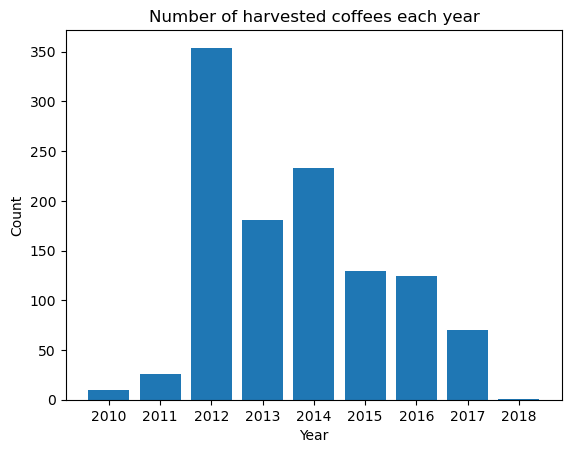

In [20]:
plt.bar(years.index, years)

plt.xticks(range(2010, 2019))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of harvested coffees each year')
plt.show()

Since we have a time interval, we can show the above diagram as a line chart as well.

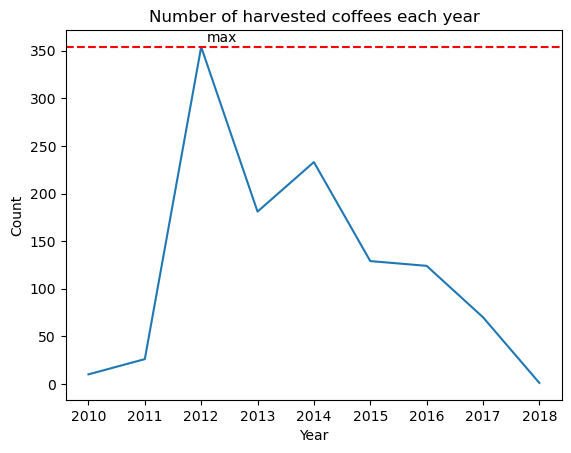

In [46]:
plt.plot(years.index, years)

# showing the maximum
# plt.scatter(years[years == years.max()].index, years.max())
plt.axhline(years.max(), color='r', linestyle='--')
plt.annotate('max', (years.idxmax() + 0.1, years.max() + 5))
plt.xticks(range(2010, 2019))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of harvested coffees each year')
plt.show()

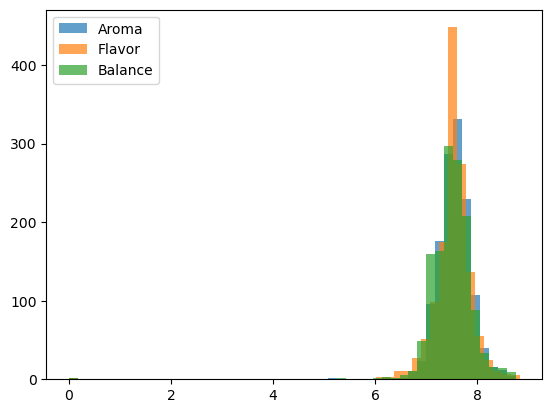

In [60]:
plt.hist(coffee.Aroma, bins=50, label='Aroma', alpha=0.7)
plt.hist(coffee.Flavor, bins=50, label='Flavor', alpha=0.7)
plt.hist(coffee.Balance, bins=50, label='Balance', alpha=0.7)
# plt.xlim(4, 10)
plt.legend()
plt.show()

In [64]:
coffee.loc[coffee.Balance < 6, ['Owner', 'Company', 'Species', 'Balance', 'Aroma', 'Flavor']]

Owner            Company  Species  Balance  Aroma  Flavor
1310  bismarck castro  cigrah s.a de c.v  Arabica     0.00    0.0    0.00
1335      luis robles          robustasa  Robusta     5.25    7.5    7.67

In [69]:
coffee.Balance[coffee.Balance > 0]
coffee[coffee.Balance > 0].Balance.min()

5.25

In [72]:
coffee[coffee.Balance > 0].nsmallest(5, 'Balance')[['Owner', 'Company', 'Species', 'Balance', 'Aroma', 'Flavor']]

Owner                   Company  Species  Balance  \
1335                 luis robles                 robustasa  Robusta     5.25   
1308  exportadora atlantic, s.a.  exportadora atlantic s.a  Arabica     6.08   
1303                     cadexsa                   cadexsa  Arabica     6.17   
1304                     cadexsa                   cadexsa  Arabica     6.17   
1305                     cadexsa                   cadexsa  Arabica     6.17   

      Aroma  Flavor  
1335   7.50    7.67  
1308   7.25    6.58  
1303   6.67    6.50  
1304   7.00    6.17  
1305   7.00    6.33

In [86]:
owner_one_coffee = coffee.Owner.value_counts() == 1

In [87]:
owner_one_coffee = owner_one_coffee[owner_one_coffee].index

In [88]:
owner_one_coffee

Index(['gonzalo hernandez',
       'ibrahim hussien speciality coffee producer &export', 'case noyale ltd',
       'shwe yin mar coffee', 'francisco a mena', 'u htun htun',
       'hider abamecha', 'bob mccauley', 'delfina leon shine',
       'kongoni estate',
       ...
       'michael gavina', 'brian beck', 'gladness obed pallangyo',
       'dario cesar galeana sanchez', 'jose daniel cobilt castro',
       'alvaro quiros perez', 'olivia hernandez virves', 'finca las nieves',
       'pedro santos e silva', 'james moore'],
      dtype='object', name='Owner', length=172)

In [89]:
coffee[coffee.Owner.isin(owner_one_coffee)]['Country.of.Origin'].value_counts()

Country.of.Origin
Mexico                          68
Tanzania, United Republic Of    24
Ethiopia                        10
Uganda                          10
Myanmar                          8
Brazil                           7
Colombia                         6
Indonesia                        5
Costa Rica                       4
Nicaragua                        4
Peru                             3
Philippines                      3
Thailand                         2
Honduras                         2
Kenya                            2
China                            2
United States                    2
Panama                           2
Mauritius                        1
Laos                             1
Ecuador                          1
Rwanda                           1
Haiti                            1
Taiwan                           1
Papua New Guinea                 1
Cote d?Ivoire                    1
Name: count, dtype: int64

We can see how many coffee owners in each country have **ONLY** 1 type of coffee. And below we can see owners with more than one coffee.

In [90]:
coffee[~coffee.Owner.isin(owner_one_coffee)]['Country.of.Origin'].value_counts()

Country.of.Origin
Guatemala                       181
Colombia                        177
Mexico                          168
Brazil                          125
Taiwan                           74
United States (Hawaii)           73
Honduras                         51
Costa Rica                       47
Ethiopia                         34
Thailand                         30
Uganda                           26
Kenya                            23
Nicaragua                        22
El Salvador                      21
Tanzania, United Republic Of     16
Indonesia                        15
China                            14
India                            14
Malawi                           11
United States                     8
Vietnam                           8
Peru                              7
Haiti                             5
United States (Puerto Rico)       4
Philippines                       2
Panama                            2
Laos                              2
Burundi   

In [103]:
country_one_owner = coffee[coffee.Owner.isin(owner_one_coffee)]['Country.of.Origin'].value_counts()

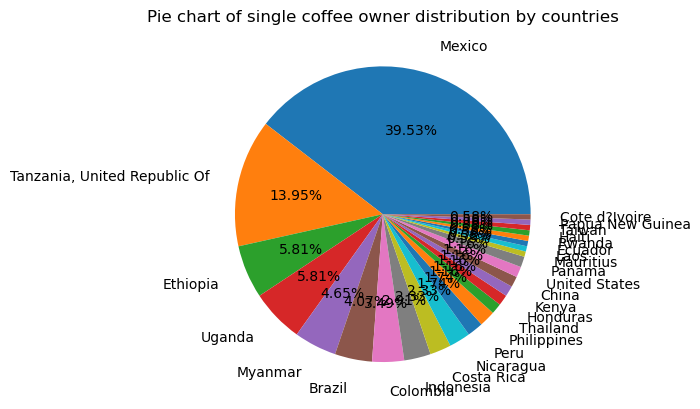

In [115]:
plt.pie(country_one_owner, labels=country_one_owner.index, labeldistance=1.2, autopct='%.2f%%')

plt.title('Pie chart of single coffee owner distribution by countries')
plt.show()

In [118]:
rating_cols = ['Aroma', 'Flavor','Aftertaste','Acidity','Body',
'Balance',
'Uniformity',
'Clean.Cup',
'Sweetness']

In [200]:
correlation = coffee[rating_cols].corr()

In [205]:
import seaborn as sns

<Axes: >

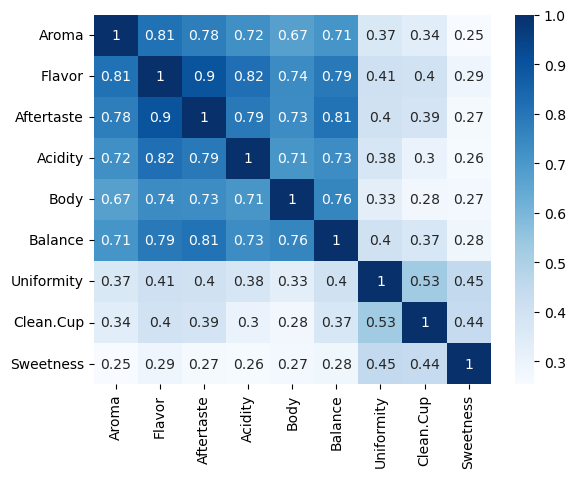

In [206]:
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)

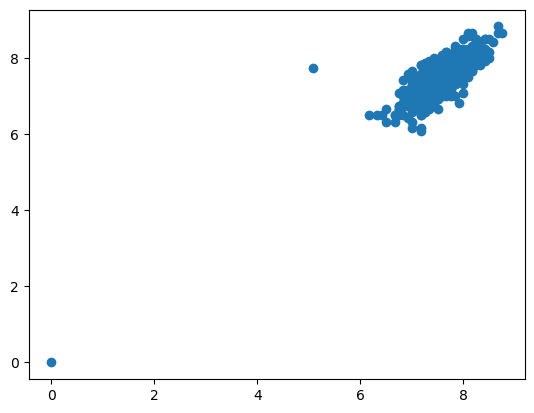

In [123]:
plt.scatter(coffee.Aroma, coffee.Flavor)
plt.show()

We see an outlier on the ) scale of X. We remove it.

In [134]:
removed_0_aroma = coffee.Aroma > 0

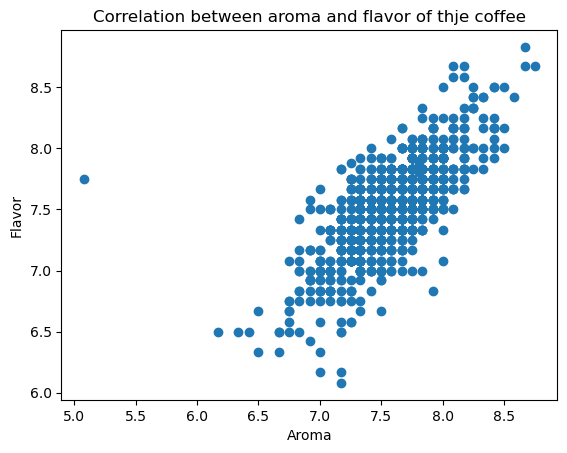

In [136]:
plt.scatter(coffee.Aroma[removed_0_aroma], coffee.Flavor[removed_0_aroma])
plt.xlabel('Aroma')
plt.ylabel('Flavor')
plt.title('Correlation between aroma and flavor of thje coffee')
plt.show()

In [143]:
coffee[['Aroma', 'Flavor']].corr('spearman')

Aroma    Flavor
Aroma   1.000000  0.715414
Flavor  0.715414  1.000000

In [154]:
mean_flavor_years = coffee_valid_years.groupby('Harvest.Year').Flavor.mean()
max_flavor_years = coffee_valid_years.groupby('Harvest.Year').Flavor.max()
min_flavor_years = coffee_valid_years.groupby('Harvest.Year').Flavor.min()
flavor_years = [mean_flavor_years, max_flavor_years, min_flavor_years]

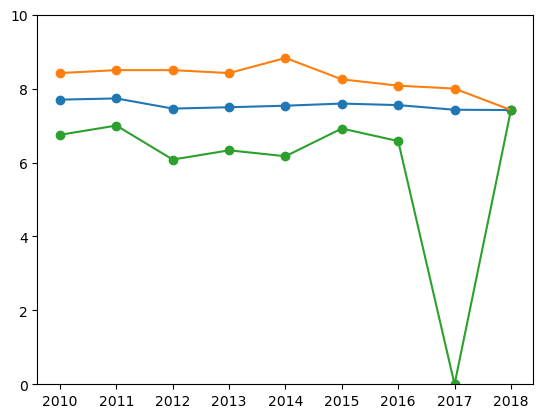

In [155]:
for item in flavor_years:
    plt.scatter(item.index, item,)
    plt.plot(item.index, item)
plt.ylim(0, 10)
plt.show()

We see an outliner with a minimum value o 0 year 2017. Exploring:

In [166]:
coffee_valid_years.groupby('Harvest.Year').Flavor.min()

Harvest.Year
2010    6.75
2011    7.00
2012    6.08
2013    6.33
2014    6.17
2015    6.92
2016    6.58
2017    0.00
2018    7.42
Name: Flavor, dtype: float64

In [167]:
coffee_valid_years[coffee_valid_years['Flavor'] == 0.0][['Aroma', 'Flavor']]

Aroma  Flavor
1310    0.0     0.0

We remove the observation

In [170]:
coffee_valid_years = coffee_valid_years.drop(index=1310)

In [171]:
coffee_valid_years.reset_index(drop=True, inplace=True)

In [172]:
coffee_valid_years

Species                Owner Country.of.Origin  \
0     Arabica            metad plc          Ethiopia   
1     Arabica            metad plc          Ethiopia   
2     Arabica  yidnekachew dabessa          Ethiopia   
3     Arabica            metad plc          Ethiopia   
4     Arabica            ji-ae ahn            Brazil   
...       ...                  ...               ...   
1122  Robusta          luis robles           Ecuador   
1123  Robusta          luis robles           Ecuador   
1124  Robusta          james moore     United States   
1125  Robusta        cafe politico             India   
1126  Robusta        cafe politico           Vietnam   

                                  Farm.Name Lot.Number            Mill  \
0                                 metad plc        NaN       metad plc   
1                                 metad plc        NaN       metad plc   
2     yidnekachew dabessa coffee plantation        NaN         wolensu   
3                                 metad plc        NaN       metad plc   
4                                       NaN        NaN             NaN   
...                                     ...        ...             ...   
1122                              robustasa   Lavado 1     our own lab   
1123                              robustasa   Lavado 3  own laboratory   
1124                        fazenda cazengo        NaN    cafe cazengo   
1125                                    NaN        NaN             NaN   
1126                                    NaN        NaN             NaN   

             ICO.Number                                Company    Altitude  \
0             2014/2015      metad agricultural developmet plc   1950-2200   
1             2014/2015      metad agricultural developmet plc   1950-2200   
2                   NaN  yidnekachew debessa coffee plantation   1800-2200   
3             2014/2015      metad agricultural developmet plc   1950-2200   
4                   NaN                                    NaN         NaN   
...                 ...                                    ...         ...   
1122                NaN                              robustasa         NaN   
1123                NaN                              robustasa          40   
1124                NaN                global opportunity fund  795 meters   
1125  14-1118-2014-0087                          cafe politico         NaN   
1126                NaN                          cafe politico         NaN   

                             Region  ...         Color  Category.Two.Defects  \
0                      guji-hambela  ...         Green                     0   
1                      guji-hambela  ...         Green                     1   
2                            oromia  ...         Green                     2   
3                      guji-hambela  ...         Green                     2   
4                               NaN  ...  Bluish-Green                     1   
...                             ...  ...           ...                   ...   
1122               san juan, playas  ...    Blue-Green                     1   
1123               san juan, playas  ...    Blue-Green                     0   
1124  kwanza norte province, angola  ...           NaN                     6   
1125                            NaN  ...         Green                     1   
1126                            NaN  ...           NaN                     9   

               Expiration                  Certification.Body  \
0         April 3rd, 2016  METAD Agricultural Development plc   
1         April 3rd, 2016  METAD Agricultural Development plc   
2        March 25th, 2016  METAD Agricultural Development plc   
3         April 3rd, 2016  METAD Agricultural Development plc   
4     September 3rd, 2014  Specialty Coffee Institute of Asia   
...                   ...                                 ...   
1122   January 18th, 2017        Specialty Coffee Association   
1123   January 18th, 2017 

We plot again

In [178]:
mean_flavor_years = coffee_valid_years.groupby('Harvest.Year').Flavor.mean()
max_flavor_years = coffee_valid_years.groupby('Harvest.Year').Flavor.max()
min_flavor_years = coffee_valid_years.groupby('Harvest.Year').Flavor.min()
flavor_years = {'mean': mean_flavor_years, 'max': max_flavor_years,'min': min_flavor_years}

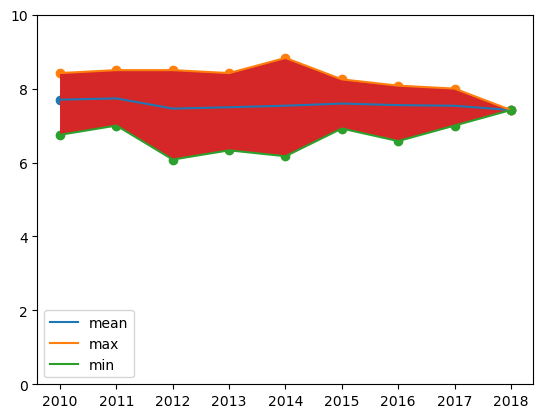

In [195]:
for item in flavor_years.keys():
    plt.scatter(flavor_years[item].index, flavor_years[item])
    plt.plot(flavor_years[item].index, flavor_years[item], label=f'{item}')

plt.fill_between(flavor_years['mean'].index, flavor_years['max'], flavor_years['min'])
plt.legend()
plt.ylim(0, 10)
plt.show()

Now we can fill the area chart

In [197]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [211]:
nuclear = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/boot/nuclear.csv', index_col=0)

In [217]:
nuclear.dtypes

cost     float64
date     float64
t1         int64
t2         int64
cap        int64
pr         int64
ne         int64
ct         int64
bw         int64
cum.n      int64
pt         int64
dtype: object

In [219]:
nuclear.columns

Index(['cost', 'date', 't1', 't2', 'cap', 'pr', 'ne', 'ct', 'bw', 'cum.n',
       'pt'],
      dtype='object')

In [224]:
nuclear.reset_index(drop=True, inplace=True)

In [225]:
nuclear

cost   date  t1  t2   cap  pr  ne  ct  bw  cum.n  pt
0   460.05  68.58  14  46   687   0   1   0   0     14   0
1   452.99  67.33  10  73  1065   0   0   1   0      1   0
2   443.22  67.33  10  85  1065   1   0   1   0      1   0
3   652.32  68.00  11  67  1065   0   1   1   0     12   0
4   642.23  68.00  11  78  1065   1   1   1   0     12   0
5   345.39  67.92  13  51   514   0   1   1   0      3   0
6   272.37  68.17  12  50   822   0   0   0   0      5   0
7   317.21  68.42  14  59   457   0   0   0   0      1   0
8   457.12  68.42  15  55   822   1   0   0   0      5   0
9   690.19  68.33  12  71   792   0   1   1   1      2   0
10  350.63  68.58  12  64   560   0   0   0   0      3   0
11  402.59  68.75  13  47   790   0   1   0   0      6   0
12  412.18  68.42  15  62   530   0   0   1   0      2   0
13  495.58  68.92  17  52  1050   0   0   0   0      7   0
14  394.36  68.92  13  65   850   0   0   0   1     16   0
15  423.32  68.42  11  67   778   0   0   0   0      3   0
16  712.27  69.50  18  60   845   0   1   0   0     17   0
17  289.66  68.42  15  76   530   1   0   1   0      2   0
18  881.24  69.17  15  67  1090   0   0   0   0      1   0
19  490.88  68.92  16  59  1050   1   0   0   0      8   0
20  567.79  68.75  11  70   913   0   0   1   1     15   0
21  665.99  70.92  22  57   828   1   1   0   0     20   0
22  621.45  69.67  16  59   786   0   0   1   0     18   0
23  608.80  70.08  19  58   821   1   0   0   0      3   0
24  473.64  70.42  19  44   538   0   0   1   0     19   0
25  697.14  71.08  20  57  1130   0   0   1   0     21   0
26  207.51  67.25  13  63   745   0   0   0   0      8   1
27  288.48  67.17   9  48   821   0   0   1   0      7   1
28  284.88  67.83  12  63   886   0   0   0   1     11   1
29  280.36  67.83  12  71   886   1   0   0   1     11   1
30  217.38  67.25  13  72   745   1   0   0   0      8   1
31  270.71  67.83   7  80   886   1   0   0   1     11   1

In [227]:
# mean cost
nuclear.cost.mean().round(2)

461.56

In [235]:
# constructed in NE region of US
nuclear['ne'].value_counts()

ne
0    24
1     8
Name: count, dtype: int64

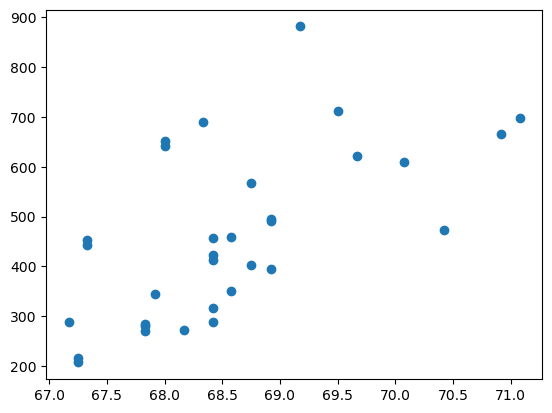

In [244]:
# general behaviour of cost over time
plt.scatter(nuclear['date'], nuclear['cost'])
plt.show()